In [147]:
import cv2 #to add logo and text for water market 
import numpy as np  
import requests
from PIL import Image 

In [148]:
#read image from url 
image  = Image.open('tree.jpg')

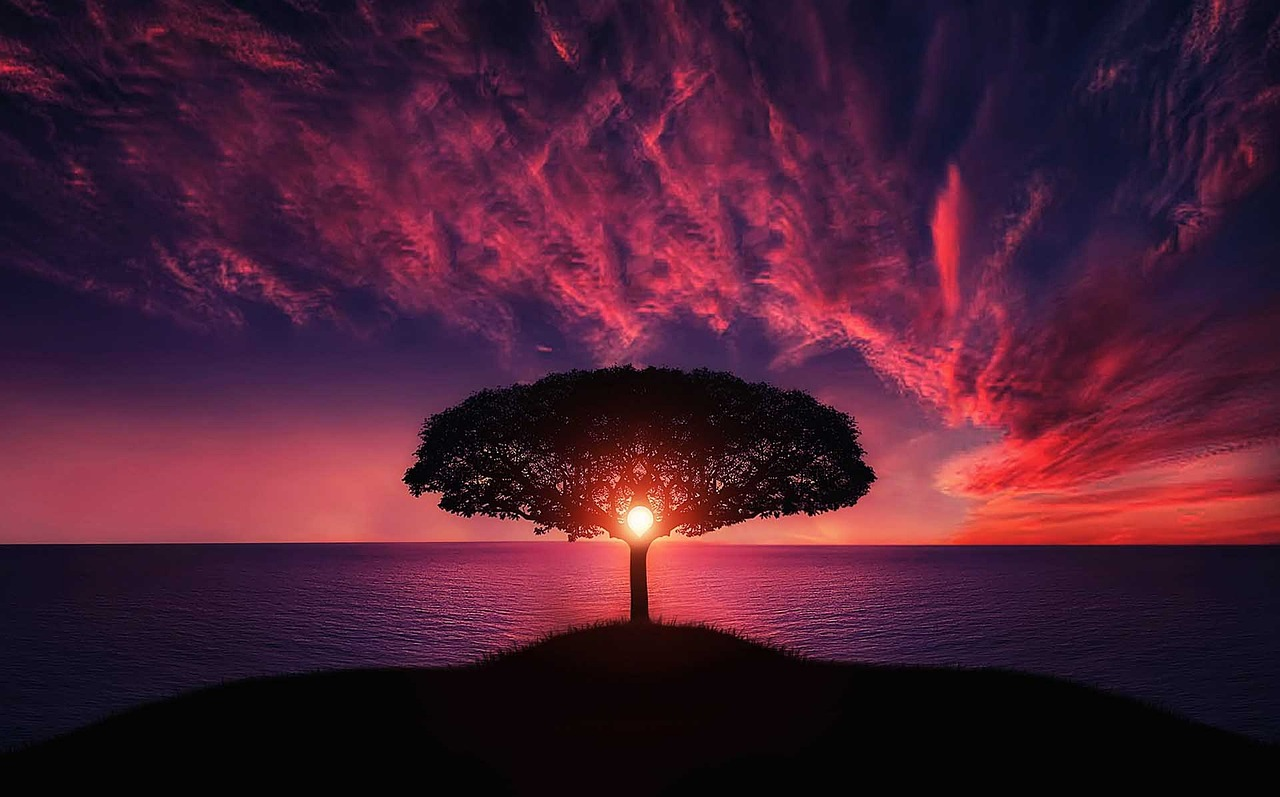

In [149]:
image

In [150]:
#resize the image and store in two variables ... 
image_logow = image.resize((500 , 300 ))
image_textw = image.resize((500 , 300))


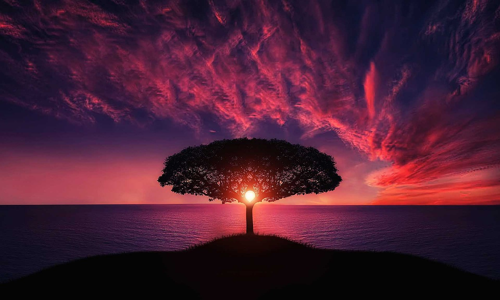

In [151]:
image_logow 

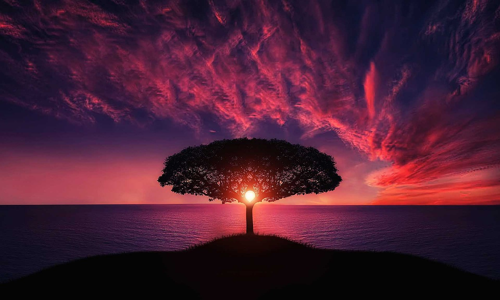

In [152]:
image_textw

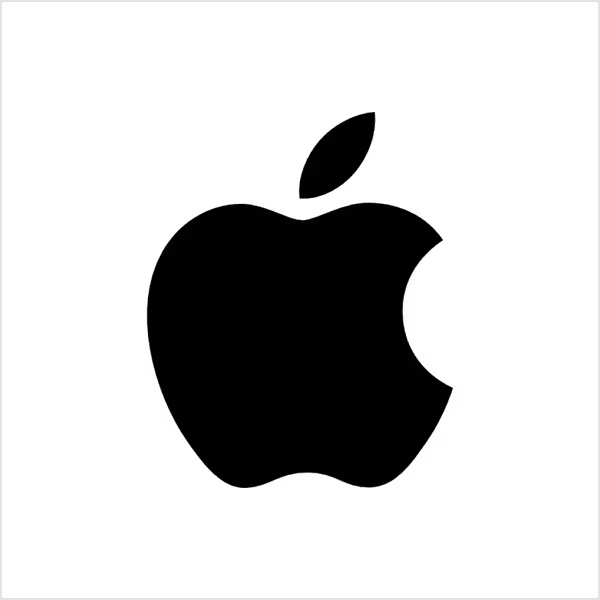

In [153]:
#now read logo that will be used to watermark 
logo = Image.open('logo.jpeg')
logo 

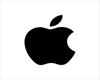

In [154]:
logo = logo.resize((100 , 80))
logo 

In [155]:
image_logow = np.array(image_logow.convert('RGB'))

In [156]:
image_logow

array([[[12, 12, 24],
        [15, 14, 26],
        [17, 14, 27],
        ...,
        [13, 14, 32],
        [13, 12, 30],
        [13, 12, 30]],

       [[13, 11, 24],
        [15, 13, 26],
        [17, 14, 28],
        ...,
        [13, 14, 32],
        [12, 12, 30],
        [12, 12, 30]],

       [[14, 11, 25],
        [14, 12, 25],
        [12, 11, 23],
        ...,
        [12, 14, 32],
        [11, 13, 30],
        [11, 12, 30]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)

In [157]:
image_logow.shape

(300, 500, 3)

In [158]:
h_image ,  w_image , _ = image_logow.shape

In [159]:
logo = np.array(logo.convert('RGB'))

In [160]:
logo

array([[[242, 242, 242],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [242, 242, 242]],

       [[247, 247, 247],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [247, 247, 247]],

       [[247, 247, 247],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [247, 247, 247]],

       [[247, 247, 247],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [247, 247, 247]],

       [[242, 242, 242],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [242, 242, 242]]

In [161]:
h_logo, w_logo , _  = logo.shape

### we are putting our water-mark on the center of the original image thus ... we have to find now center of the image 

In [162]:
center_y = int(h_image/2)
center_x = int(w_image / 2 )
center_x , center_y

(250, 150)

### finding top , left , bottom , right corners 

In [163]:
top_y = center_y - int(h_logo/2)
left_x = center_x - int(w_logo / 2 )

top_y  , left_x

(110, 200)

In [164]:
bottom_y = top_y + h_logo 
right_x = left_x + w_logo

bottom_y , right_x

(190, 300)

#### findding area where we willl put watermark 

In [165]:
region = image_logow[top_y:bottom_y , left_x:right_x]

In [166]:
print("image_logow shpae  = " , image_logow.shape)
print("region shape =   ", region.shape)

image_logow shpae  =  (300, 500, 3)
region shape =    (80, 100, 3)


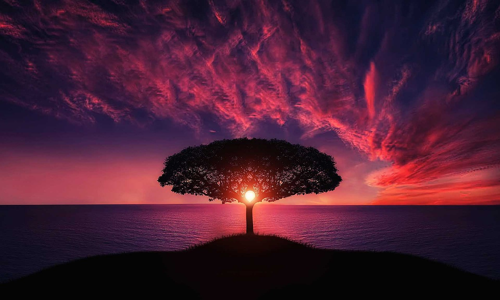

In [167]:
Image.fromarray(image_logow)

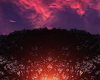

In [168]:
Image.fromarray(region)

In [169]:
#adding logo to that region 
result  = cv2.addWeighted(region , 1 , logo , 1 , 0 )

In [170]:
logo.shape

(80, 100, 3)

In [171]:
result.shape

(80, 100, 3)

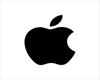

In [172]:
Image.fromarray(logo)

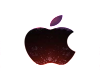

In [173]:
Image.fromarray(result)

In [174]:
#replace the region on the image 
image_logow[top_y:bottom_y , left_x:right_x]  = result 


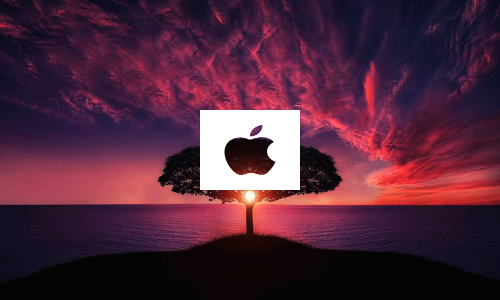

In [175]:
img = Image.fromarray(image_logow , 'RGB')
img